# Visualisation des données clients

Ce fichier donne un aperçu des données du client.

In [1]:
import pandas as pd
import missingno as msno 
import matplotlib.pyplot as plt

# On choisi le fichier "Sonde Canon 6 markies.csv" pour l'exemple
df = pd.read_csv("data/Data 2022/Probes/Sonde Canon 6 markies.csv", sep=";")
df['Date/heure'] = pd.to_datetime(df['Date/heure'], format="%Y-%m-%d %H:%M:%S")
df = df.sort_values(by='Date/heure').reset_index(drop=True)
df.head()

,Date/heure,Température de l'air MOY [°C],Température de l'air MAX [°C],Température de l'air MIN [°C],Précipitations [mm],EAG Humidité du sol 1 [%],EAG Humidité du sol 2 [%],EAG Humidité du sol 3 [%],EAG Humidité du sol 4 [%],EAG Humidité du sol 5 [%],...,Température du sol MAX 4 [°C],Température du sol MIN 4 [°C],Température du sol MOY 5 [°C],Température du sol MAX 5 [°C],Température du sol MIN 5 [°C],Température du sol MOY 6 [°C],Température du sol MAX 6 [°C],Température du sol MIN 6 [°C],Panneau solaire [mV],Batterie [mV]
0,2022-06-02 17:00:00,"25,52","25,98","25,07",0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7419,6784
1,2022-06-02 18:00:00,"23,64","24,87","23,09",0,0,0,0,"0,07","9,58",...,"26,4","25,2","22,7","23,1","22,5","18,7","19,4","18,5",9753,6801
2,2022-06-02 19:00:00,"22,65","23,21","22,13",0,0,0,0,"0,07","9,8",...,"26,5","25,7","23,4","23,6","23,2","19,4","19,8",19,8991,6793
3,2022-06-02 20:00:00,"21,13","22,35","19,1",0,0,0,0,"0,08","9,77",...,"25,4","19,3","22,4","23,4","21,7","19,9",20,"19,8",4826,6625
4,2022-06-02 21:00:00,"18,08","20,12","15,36",0,0,0,"0,01","0,11","9,7",...,"18,7",15,"20,4","21,5","19,6","19,8",20,"19,7",723,6556


On peut s'intéresser au données manquantes: la commande ci-dessous permet d'afficher la complétude de chaque colonne: on en conclu que les données fournies sont très complètes et n'ont que très peu de manquement.

<AxesSubplot: >

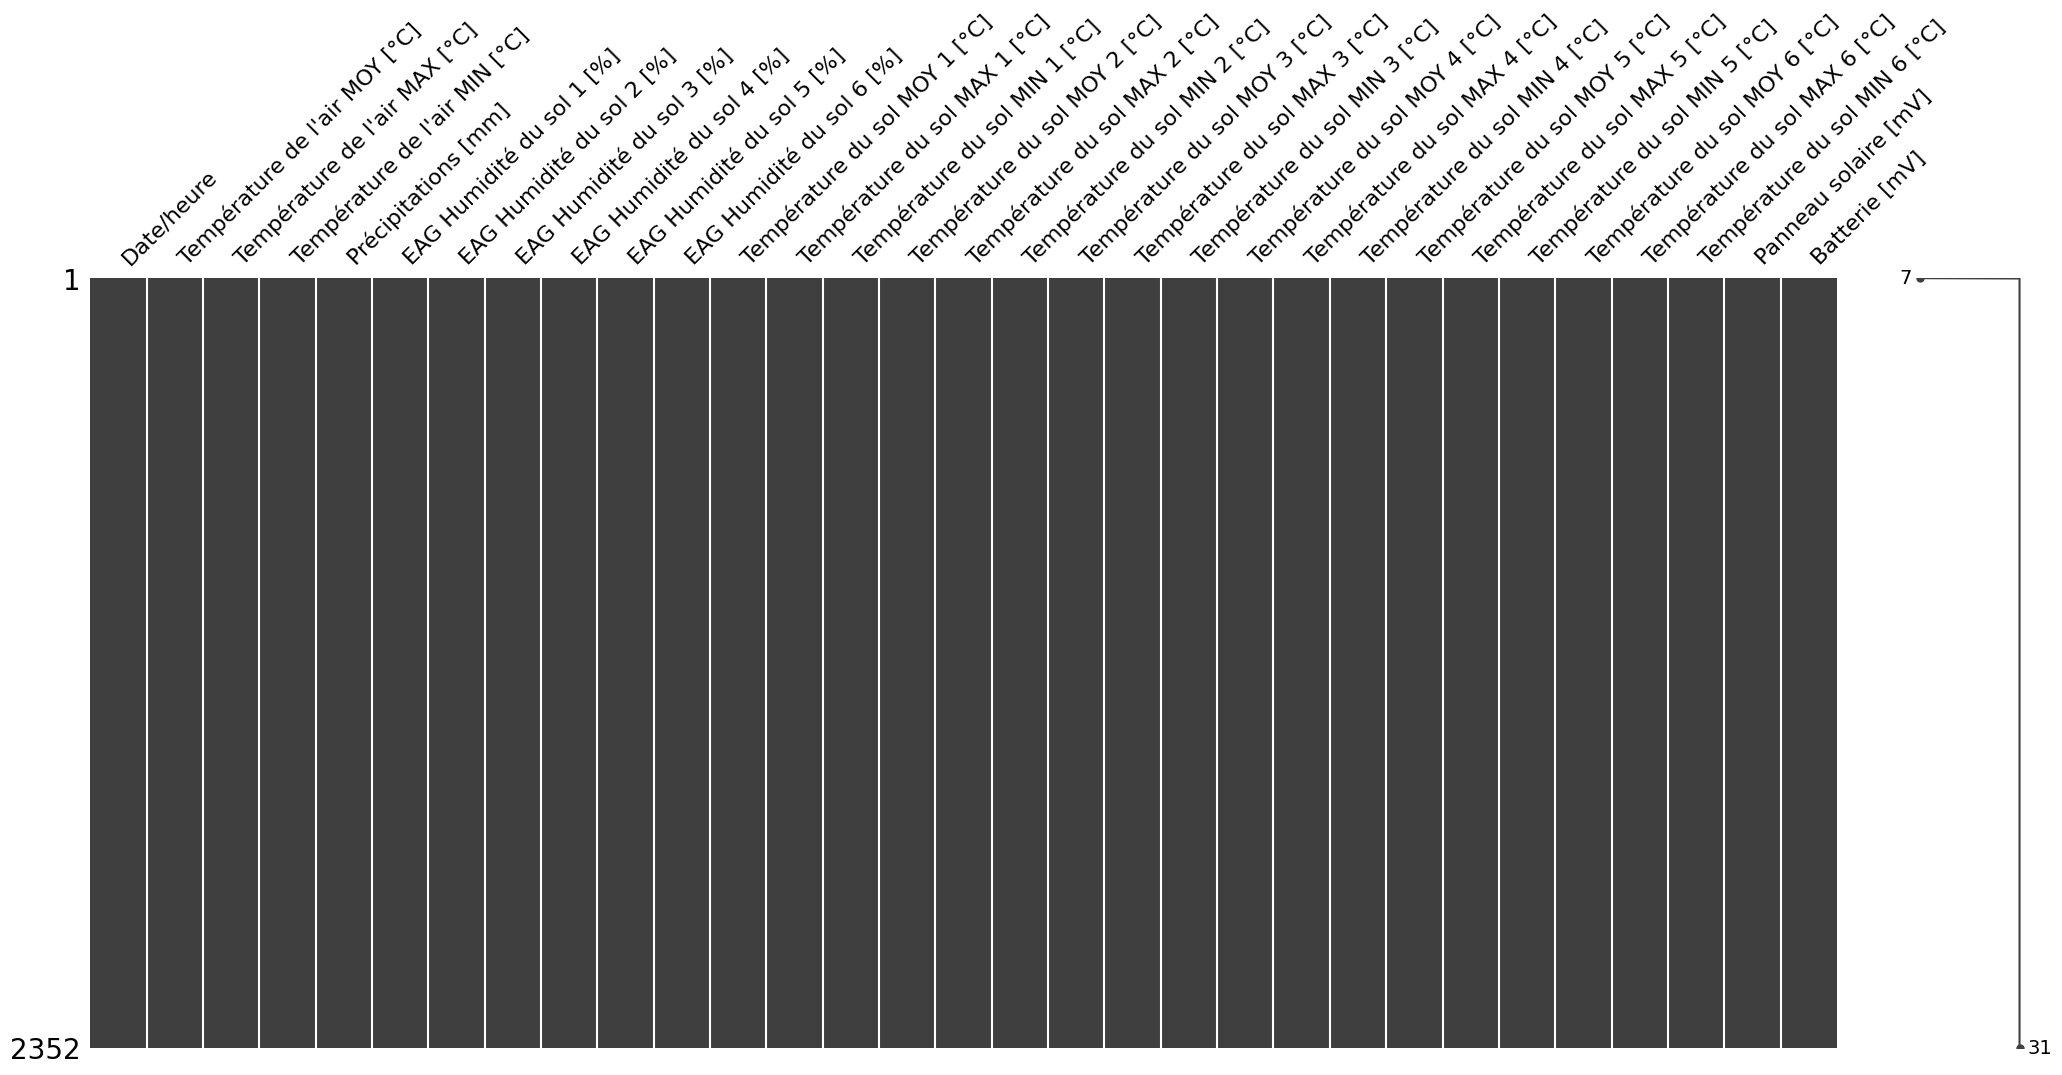

In [2]:
msno.matrix(df) 

On peut s'intéresser à des valeurs d'intérêts du fichier, comme le nombre de valeurs différentes ou le type de chaque colonne.

In [3]:
print("Nombre d'instants de collecte de données différents :", len(df['Date/heure'].unique()))

Nombre d'instants de collecte de données différents : 2352


In [4]:
for column in df.columns:
    if column not in ['Date/heure', 'Batterie [mV]', 'Panneau solaire [mV]'] :
        # Permet de passer les valeurs de la colonne en float en remplaçant les virgules par des points.
        try:
            df[column] = df[column].str.replace(',', '.').astype(float)
        except:
            print('[ERROR] La colonne', column, "ne peut pas être convertie en float. Peut-être qu\'elle contient des valeurs non numériques ou est déja en float.")
df.dtypes

Date/heure                       datetime64[ns]
Température de l'air MOY [°C]           float64
Température de l'air MAX [°C]           float64
Température de l'air MIN [°C]           float64
Précipitations [mm]                     float64
EAG Humidité du sol 1 [%]               float64
EAG Humidité du sol 2 [%]               float64
EAG Humidité du sol 3 [%]               float64
EAG Humidité du sol 4 [%]               float64
EAG Humidité du sol 5 [%]               float64
EAG Humidité du sol 6 [%]               float64
Température du sol MOY 1 [°C]           float64
Température du sol MAX 1 [°C]           float64
Température du sol MIN 1 [°C]           float64
Température du sol MOY 2 [°C]           float64
Température du sol MAX 2 [°C]           float64
Température du sol MIN 2 [°C]           float64
Température du sol MOY 3 [°C]           float64
Température du sol MAX 3 [°C]           float64
Température du sol MIN 3 [°C]           float64
Température du sol MOY 4 [°C]           

Finalement, on peut tracer les courbes de l'humidité du sol: c'est notre quantité d'intérêt pour l'assimilation de données, et c'est à partir de cela que l'on réussira à améliorer le modèle WOFOST.

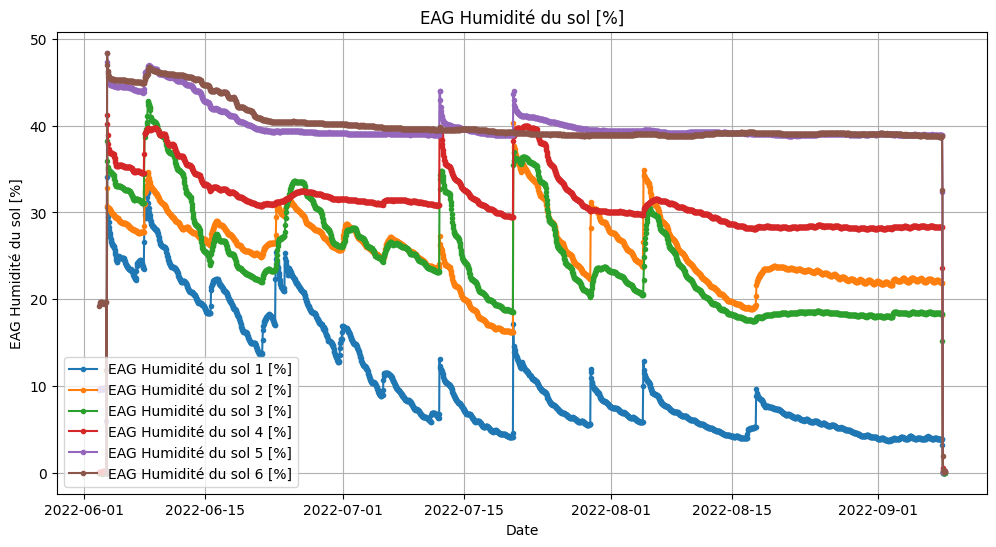

In [5]:
plt.figure(figsize=(12, 6))

for i in range(1, 7):
    column_name = f'EAG Humidité du sol {i} [%]'
    plt.plot(df['Date/heure'],df[column_name], marker='.', label=column_name)
plt.title("EAG Humidité du sol [%]")
plt.xlabel('Date')
plt.legend()
plt.ylabel("EAG Humidité du sol [%]")
plt.grid(True)
plt.show()

On peut aussi tracer les relevés de température, même s'ils ne nous serviront pas dans le cadre de ce projet. Il est intéressant de constater les écarts en température, relativement constant sur l'année

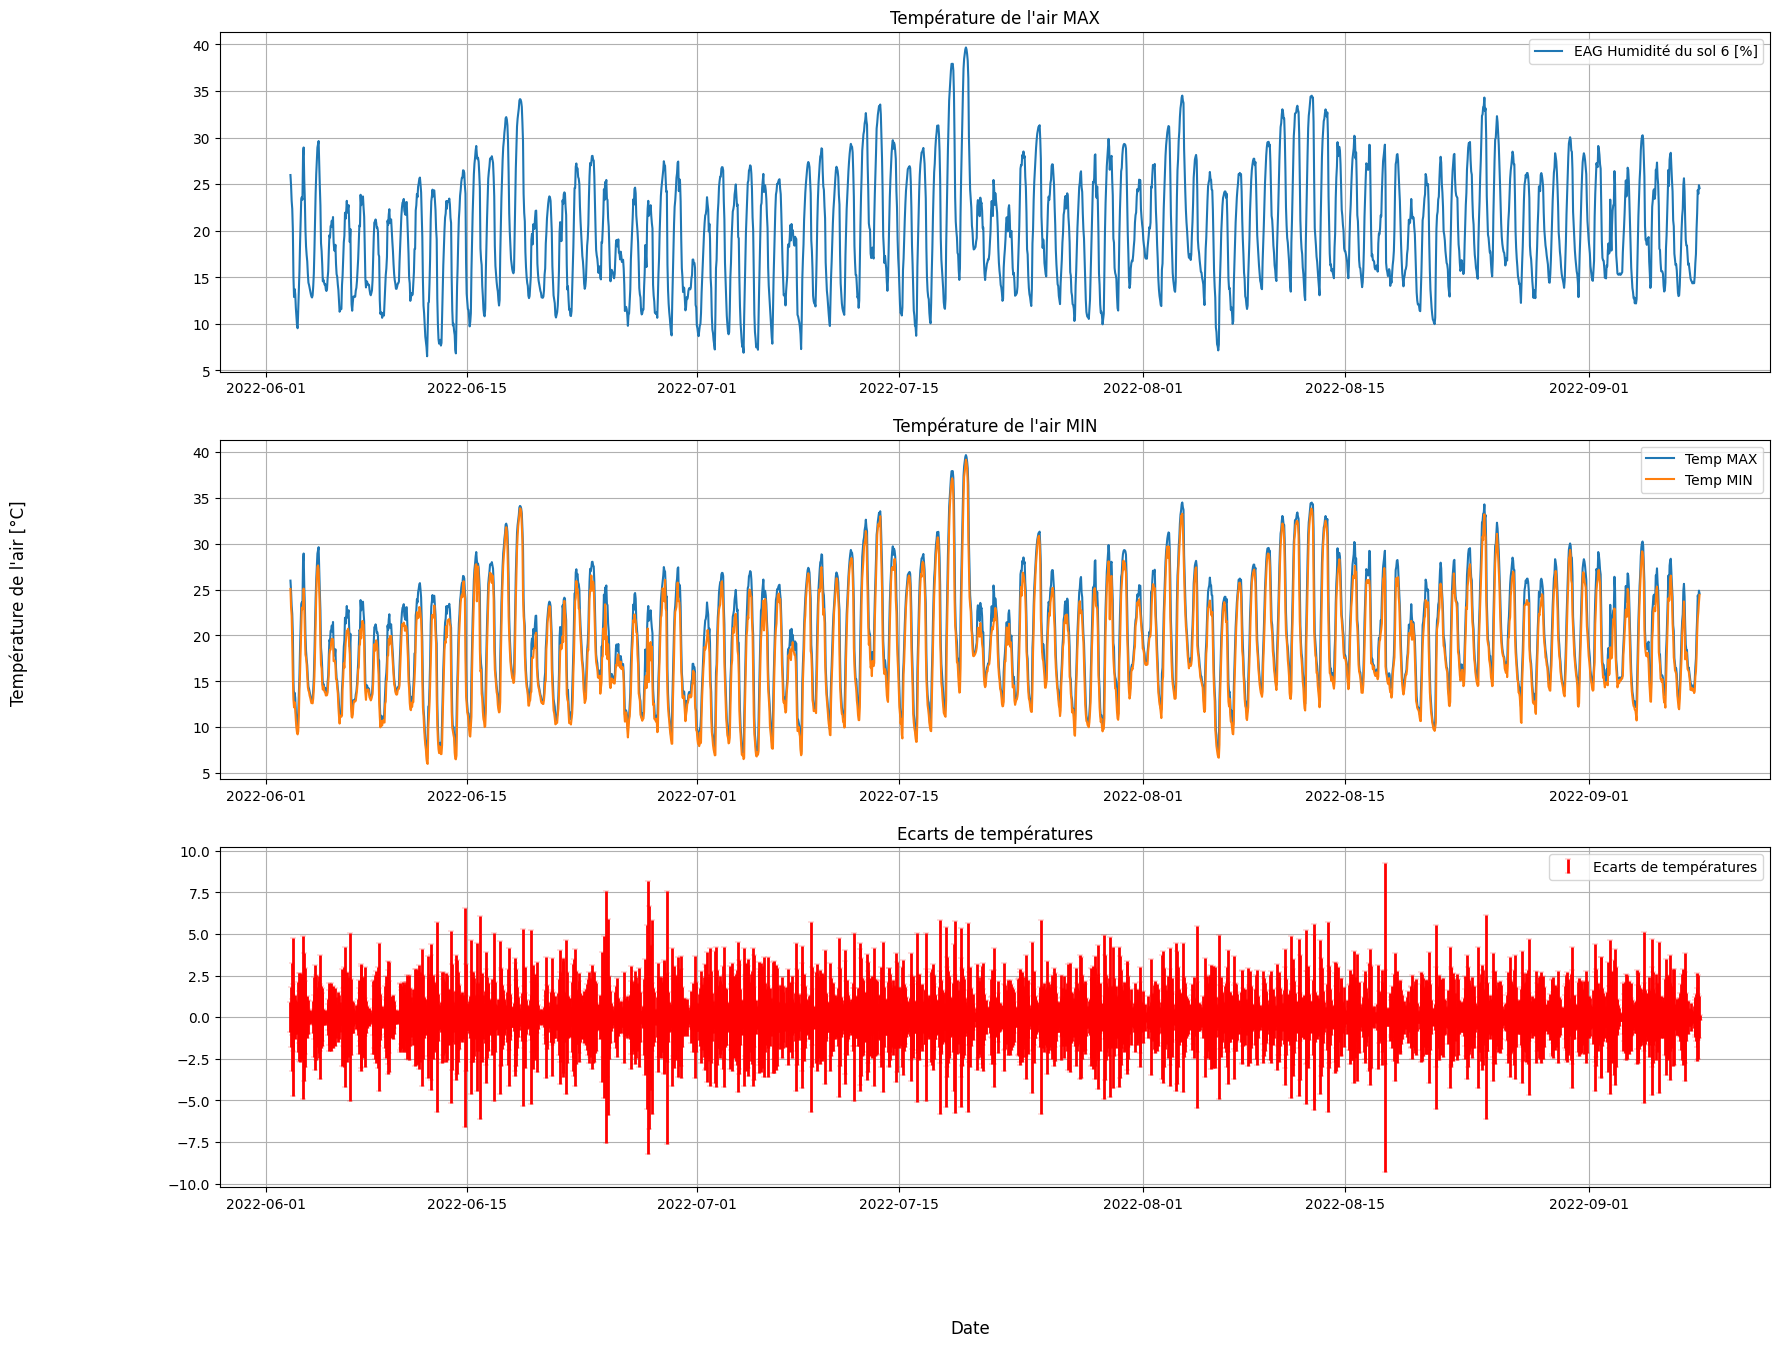

In [6]:
fig, ax = plt.subplots(3, 1, figsize=(20, 15))

ax[0].plot(df['Date/heure'],df['Température de l\'air MAX [°C]'], label=column_name)
ax[0].set_title("Température de l'air MAX")
ax[0].legend()
ax[0].grid(True)

ax[1].plot(df['Date/heure'],df['Température de l\'air MAX [°C]'], label="Temp MAX")
ax[1].plot(df['Date/heure'],df['Température de l\'air MIN [°C]'], label="Temp MIN")
ax[1].set_title("Température de l'air MIN")
ax[1].legend()
ax[1].grid(True)

ax[2].errorbar(df['Date/heure'],[0]*len(df['Date/heure']), yerr = df['Température de l\'air MAX [°C]']-df['Température de l\'air MIN [°C]'], label="Ecarts de températures",fmt = 'none', capsize = 2, ecolor = 'red', elinewidth = 2, capthick =  0.2)
ax[2].set_title("Ecarts de températures")
ax[2].legend()
ax[2].grid(True)

fig.supxlabel('Date')
fig.supylabel('Température de l\'air [°C]')
plt.show()